**Data Preprocessing**

In [101]:
pip install tensorflow

In [102]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,MaxPooling1D,Input,GlobalMaxPooling1D,Embedding,Conv1D
from tensorflow.keras.models import Model

In [104]:
df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='ISO-8859-1')

In [105]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [106]:
#Drop Garbage Column
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [107]:
#rename column
df.rename(columns={'v1':'Label','v2':'data'},inplace=True)
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)

In [108]:
df.head()

,Label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
df.shape

(5572, 2)

In [110]:
#create the binary label (0,1)
df['b_label']=df['Label'].map({'ham':0,'spam':1})        #create a new column b_label
y=df['b_label'].values


In [111]:
df['b_label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: b_label, Length: 5572, dtype: int64

In [112]:
y.shape

(5572,)

In [113]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33)


In [114]:
max_voc_size=20000
tokenizer=Tokenizer(num_words=max_voc_size)


In [115]:
tokenizer.fit_on_texts(x_train)


In [116]:
sequence_train=tokenizer.texts_to_sequences(x_train)
sequence_test=tokenizer.texts_to_sequences(x_test)

In [117]:
# x_train[1]

In [118]:
sequence_train[0]

[108,
 373,
 586,
 907,
 587,
 9,
 5,
 1268,
 373,
 479,
 3,
 907,
 266,
 23,
 448,
 44,
 3471,
 3472,
 3473,
 3474,
 24,
 4,
 60,
 74,
 9,
 405,
 1474]

In [119]:
len(sequence_train[0])

27

In [120]:
len(sequence_train[1])

5

In [121]:
#check word index mapping
word2idx=tokenizer.word_index
v=len(word2idx)
print('total number of unique token are %s' %v)


total number of unique token are 7240


In [122]:
#pad sequence to get N x T matrix
data_train=pad_sequences(sequence_train)
print('shape of train tensor',data_train.shape)


shape of train tensor (3733, 189)


In [123]:
len(data_train[0])

189

In [124]:
len(data_train[1])

189

In [128]:
#set the value of T to get the sequence lenth
T=data_train.shape[1]

In [129]:
print(T)

189


In [131]:
#pad the test set
data_test=pad_sequences(sequence_test,maxlen=T)
#maxlen=T . to truncate longer sentence in test set
print("shape of data test tensor",data_test.shape)

shape of data test tensor (1839, 189)


**Building the model**

In [133]:
# Create the model

# Choose embedding dimensionality
D = 20  # this is a hyper parameter, we can choose any word vector size that we want

# Input layer
i = Input(shape=(T,))  # input layer takes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(v+ 1, D)(i) # This takes in sequences of integers and returns sequences of word vectors
# This will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

#  First CNN layer
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Second CNN layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN layer
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [134]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [135]:
# Train the model
r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 4s 19ms/step - loss: 0.3964 - accuracy: 0.8642 - val_loss: 0.2893 - val_accuracy: 0.8662
Epoch 2/5
117/117 [==============================] - 2s 21ms/step - loss: 0.1658 - accuracy: 0.9306 - val_loss: 0.1080 - val_accuracy: 0.9608
Epoch 3/5
117/117 [==============================] - 4s 32ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0975 - val_accuracy: 0.9744
Epoch 4/5
117/117 [==============================] - 2s 18ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0650 - val_accuracy: 0.9837
Epoch 5/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0836 - val_accuracy: 0.9810


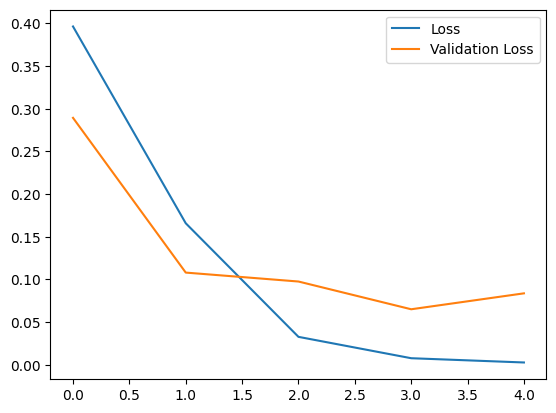

In [136]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

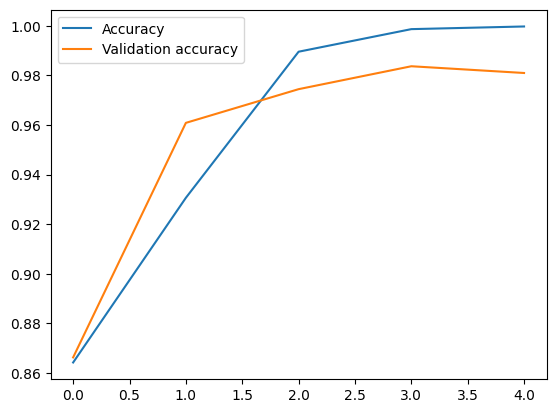

In [137]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()